## Naive Bayes

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

Model: GaussianNB
Accuracy: 0.9777777777777777
Precision (macro): 0.9761904761904763
Recall (macro): 0.9743589743589745
F1 Score (macro): 0.974320987654321

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



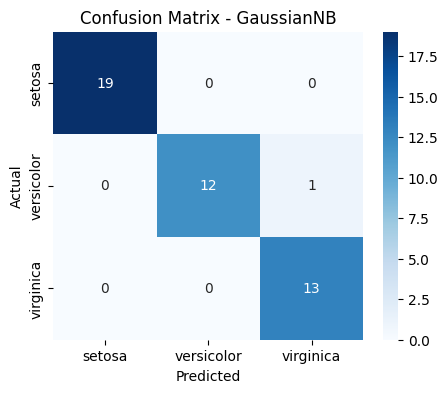

Model: MultinomialNB
Accuracy: 0.9555555555555556
Precision (macro): 0.9487179487179488
Recall (macro): 0.9487179487179488
F1 Score (macro): 0.9487179487179488

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



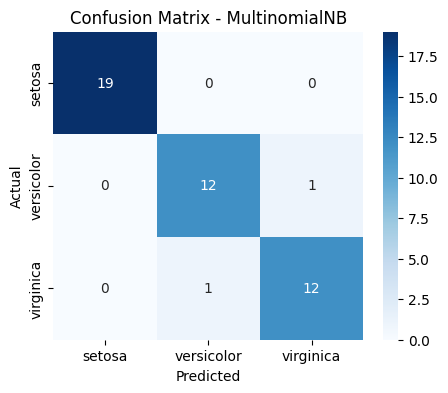

Model: BernoulliNB
Accuracy: 0.28888888888888886
Precision (macro): 0.09629629629629628
Recall (macro): 0.3333333333333333
F1 Score (macro): 0.14942528735632185

Confusion Matrix:
 [[ 0 19  0]
 [ 0 13  0]
 [ 0 13  0]]

Classification Report:
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
  versicolor       0.29      1.00      0.45        13
   virginica       0.00      0.00      0.00        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

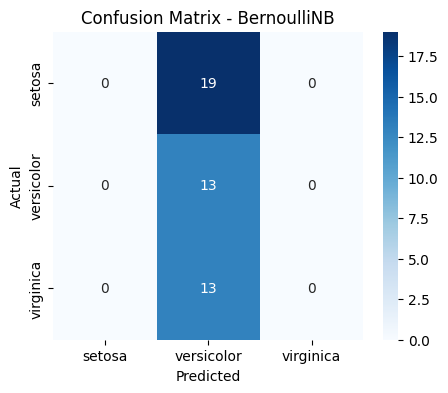

In [2]:
for name, model in models.items():
    print(f"Model: {name}")
    print("==============================")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [3]:
import pandas as pd

# Create summary list
summary = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (macro)": precision_score(y_test, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_test, y_pred, average='macro'),
        "F1 Score (macro)": f1_score(y_test, y_pred, average='macro')
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary)

# Print consolidated report
print("   CONSOLIDATED REPORT")
print(summary_df)


   CONSOLIDATED REPORT
           Model  Accuracy  Precision (macro)  Recall (macro)  \
0     GaussianNB  0.977778           0.976190        0.974359   
1  MultinomialNB  0.955556           0.948718        0.948718   
2    BernoulliNB  0.288889           0.096296        0.333333   

   F1 Score (macro)  
0          0.974321  
1          0.948718  
2          0.149425  


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
